# Detecção e Rastreamento de Fogo em Tempo Real com YOLOv5

## Grupo Visionários

###Integrantes do grupo

Daniel Ribeiro da Silva - 202105835<br>
Fabrycio Leite Nakano Almada - 202107717<br>
Maykon Adriell Dutra - 202108785<br>
Victor Emanuel da Silva Monteiro - 202105867<br>

# TREINAMENTO DO MODELO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone 'https://github.com/spacewalk01/Yolov5-Fire-Detection' '/content/drive/My Drive/TCCeCV/fire-detection'

Cloning into '/content/drive/My Drive/TCCeCV/fire-detection'...
remote: Enumerating objects: 475, done.
remote: Counting objects: 100% (472/472), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 475 (delta 259), reused 454 (delta 250), pack-reused 3
Receiving objects: 100% (475/475), 47.35 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [ ]:
%cd '/content/drive/My Drive/TCCeCV/fire-detection'

/content/drive/My Drive/TCCeCV/fire-detection


In [ ]:
!ls

datasets	  input.mp4  models	results
fire_config.yaml  LICENSE    README.md	train.ipynb


In [ ]:
!unzip '/content/drive/My Drive/TCCeCV/fire.zip' -d '/content/drive/My Drive/TCCeCV/fire-detection/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1151.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1152.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1155.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1157.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1169.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1171.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1178.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1179.jpg  
  inflating: /content/drive/My Drive/TCCeCV/fire-detection/datasets/fire/train/images/WEBFire1180.jpg  
  inflating: 

In [ ]:
%cd
%cd '/content/drive/My Drive/TCCeCV/fire-detection'

/root
/content/drive/My Drive/TCCeCV/fire-detection


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15829, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 15829 (delta 21), reused 26 (delta 5), pack-reused 15769
Receiving objects: 100% (15829/15829), 14.59 MiB | 14.19 MiB/s, done.
Resolving deltas: 100% (10835/10835), done.


In [ ]:
%cd yolov5/

/content/drive/MyDrive/TCCeCV/fire-detection/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.1/605.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data ../fire_config.yaml --weights yolov5s.pt --workers 0

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, fr

# SIMULAÇÃO DE PROPAGAÇÃO DO FOGO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
linhas = 50
colunas = 50

In [ ]:
prob_inicial_fogo = 0.001

In [ ]:
prob_propagacao_fogo = {
    (0, 1): 0.2,   #direita
    (0, -1): 0.2,  #esquerda
    (1, 0): 0.2,   #sul
    (-1, 0): 0.2,  #norte
}


In [ ]:
def inicializar_grade(linhas, colunas, prob_inicial_fogo):
    grade = np.zeros((linhas, colunas), dtype=int)
    for linha in range(linhas):
        for coluna in range(colunas):
            if random.random() < prob_inicial_fogo:
                grade[linha, coluna] = 2  #celula em chamas
            else:
                grade[linha, coluna] = 1  #vegetacao
    return grade

In [ ]:
def atualizar_grade(grade, prob_propagacao_fogo):
    nova_grade = np.copy(grade)
    for linha in range(linhas):
        for coluna in range(colunas):
            if grade[linha, coluna] == 2:  #celula em chamas
                for dl, dc in prob_propagacao_fogo.keys():
                    nova_linha, nova_coluna = linha + dl, coluna + dc
                    if 0 <= nova_linha < linhas and 0 <= nova_coluna < colunas and grade[nova_linha, nova_coluna] == 1:
                        if random.random() < prob_propagacao_fogo[(dl, dc)]:
                            nova_grade[nova_linha, nova_coluna] = 2  #propagacao  fogo
    return nova_grade

In [ ]:
def create_custom_colormap():
    colors = [(0, 1, 0),  #verde (vegetacao)
              (1, 0, 0)]  #vermelho (fogo)
    cmap = LinearSegmentedColormap.from_list("CustomColormap", colors, N=2)
    return cmap

In [ ]:
def visualizar_grade(grade):
    custom_cmap = create_custom_colormap()
    plt.imshow(grade, cmap=custom_cmap, interpolation='nearest')
    plt.colorbar()
    plt.title("Simulação de Propagação de Fogo")
    plt.show()


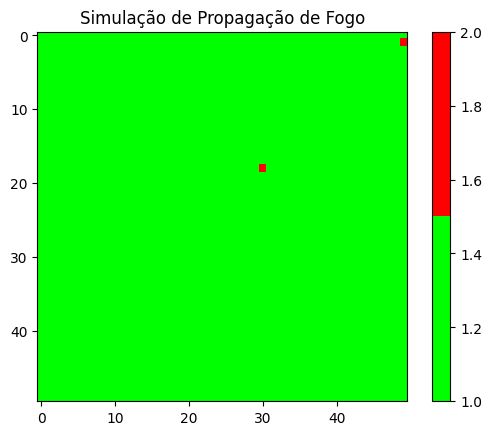

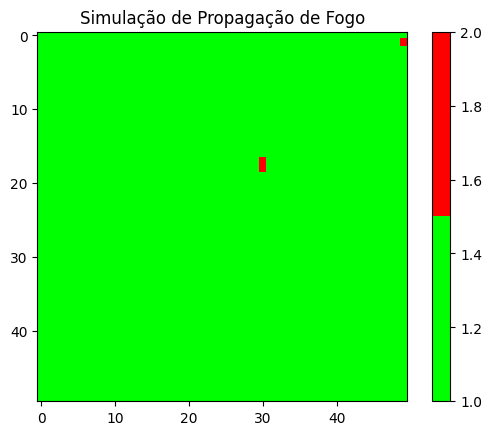

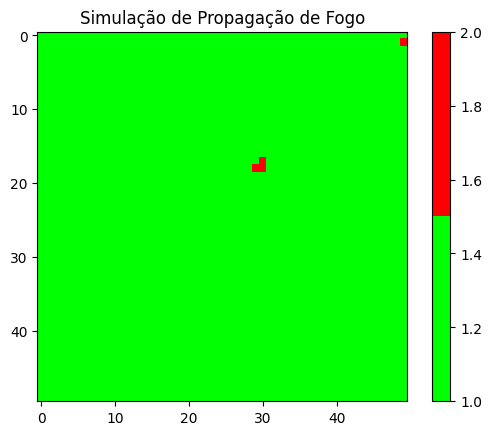

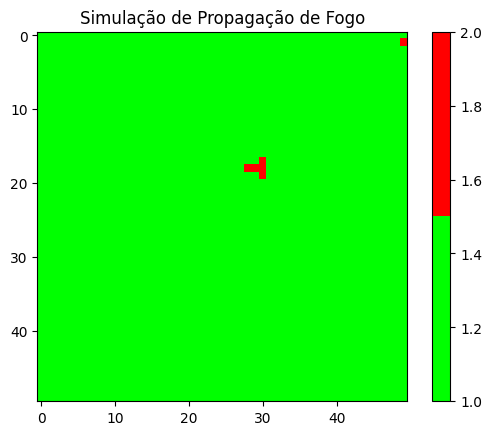

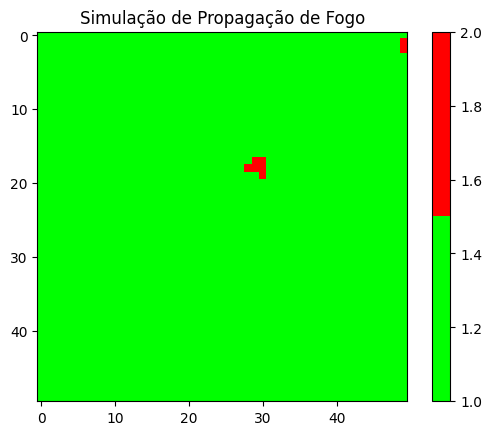

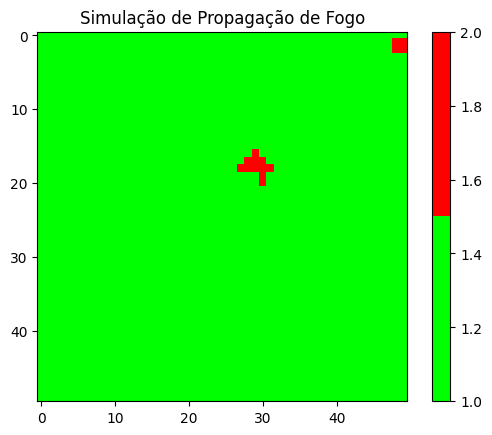

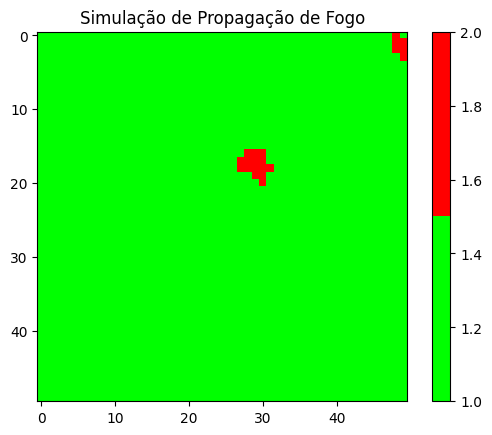

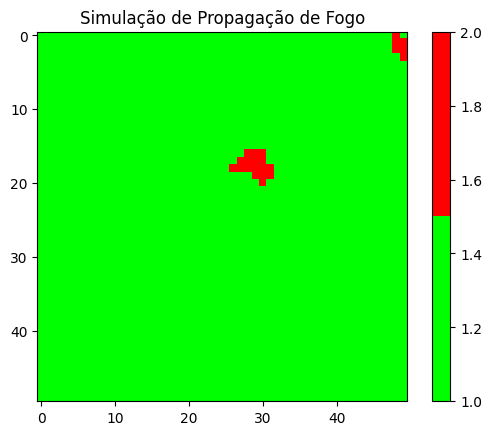

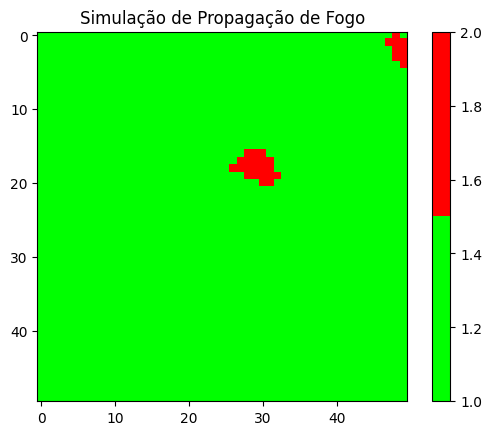

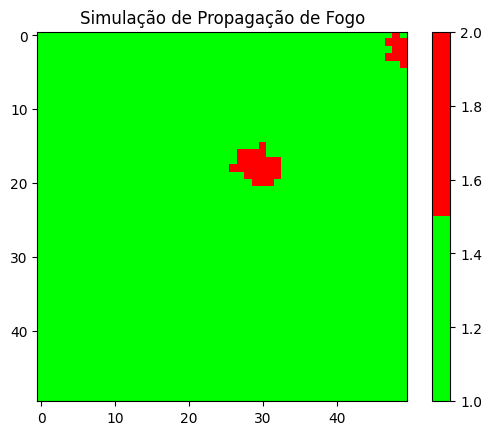

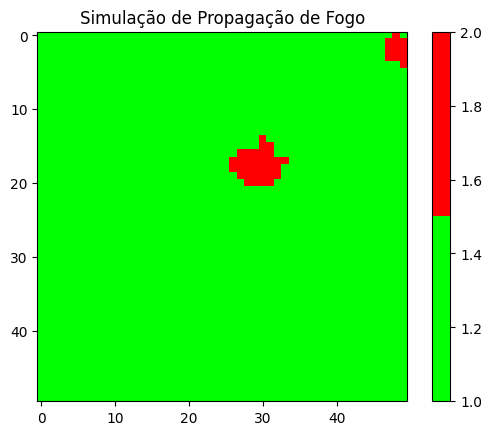

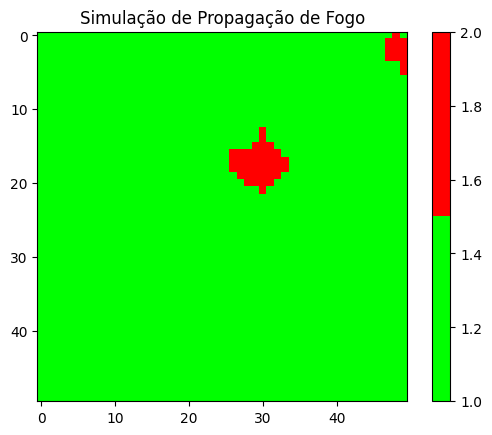

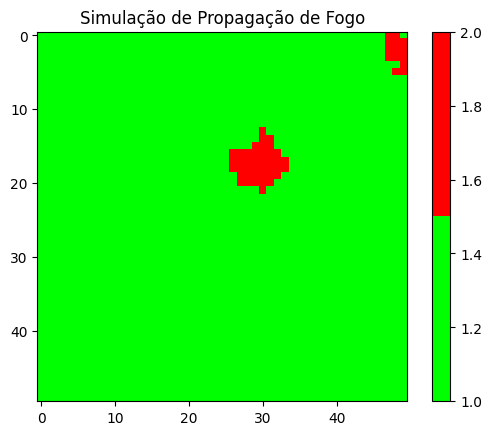

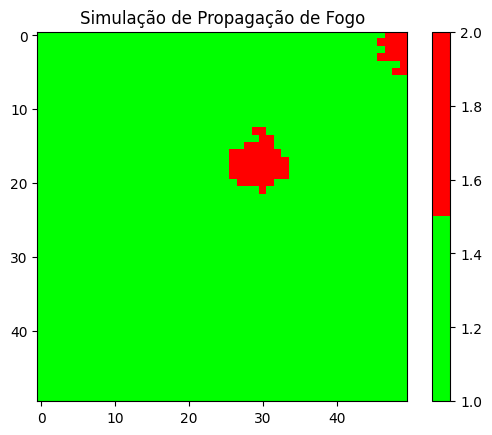

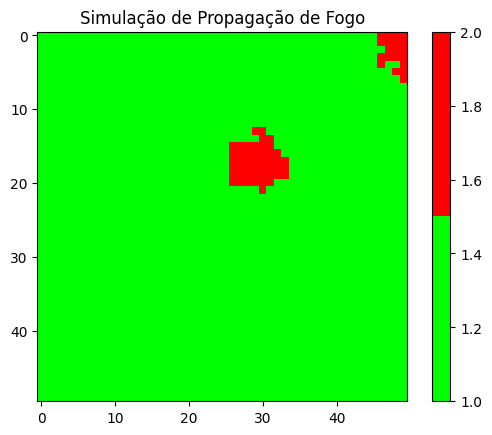

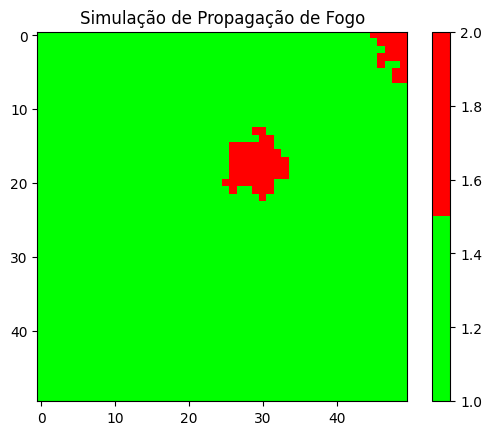

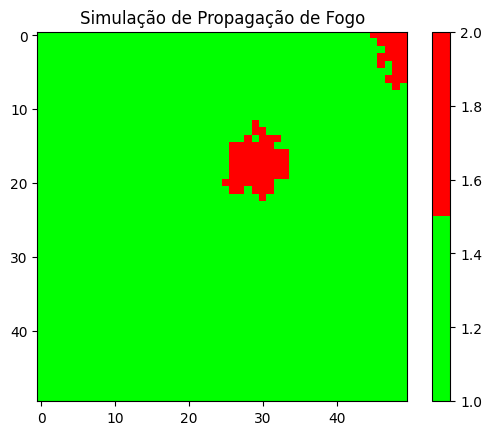

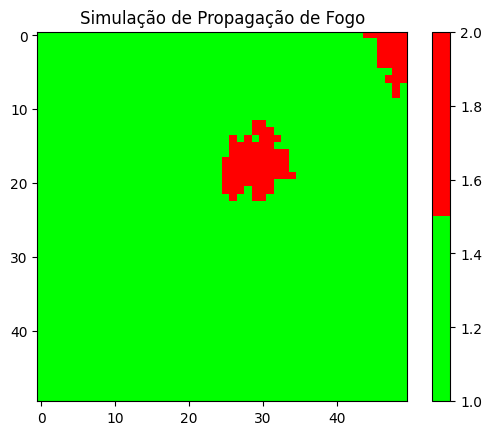

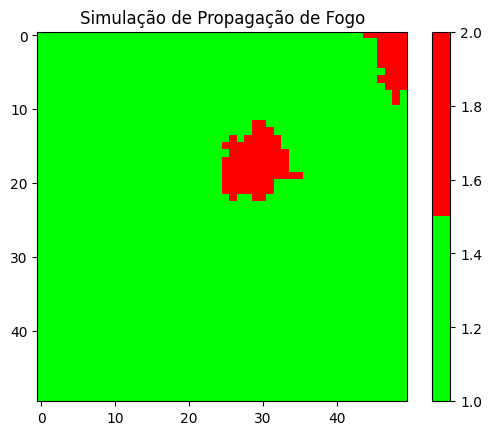

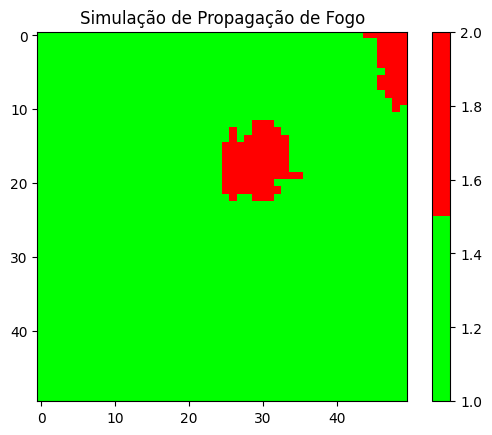

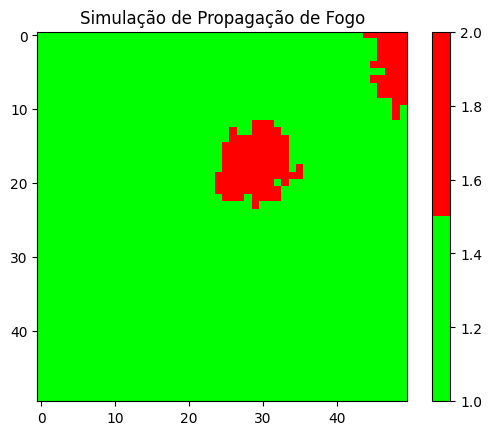

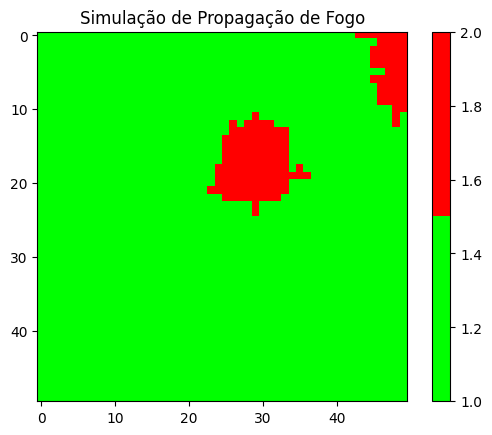

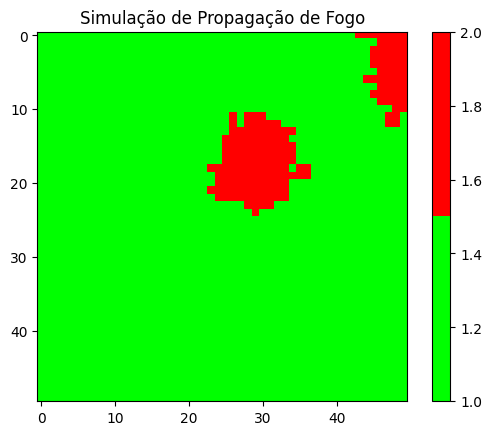

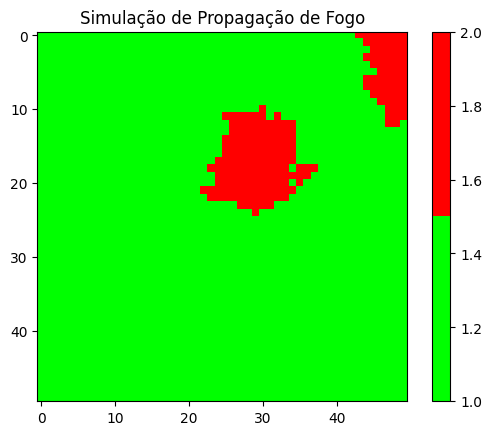

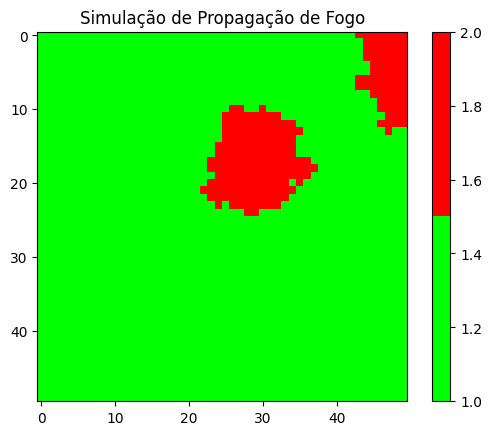

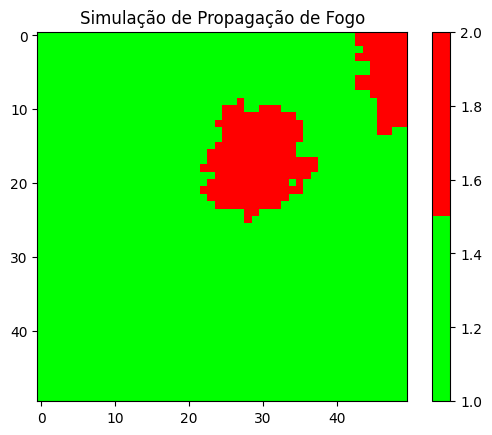

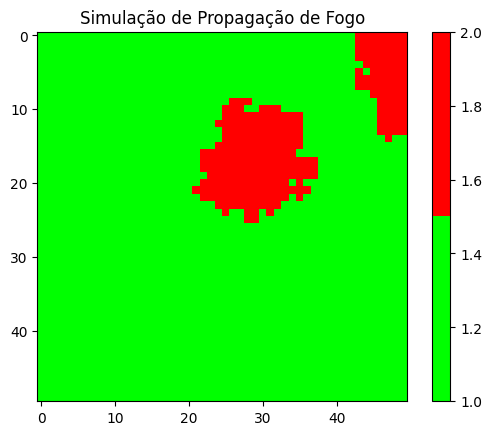

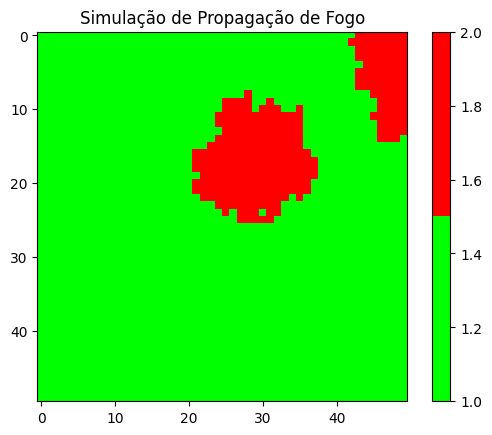

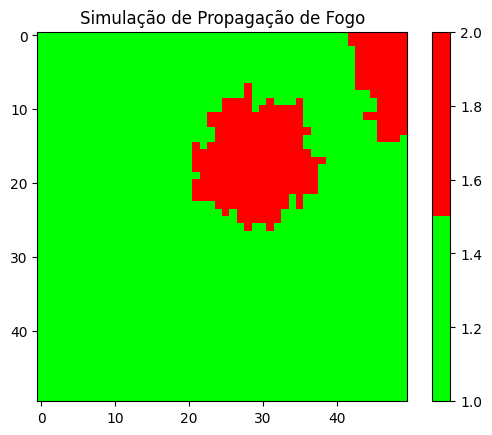

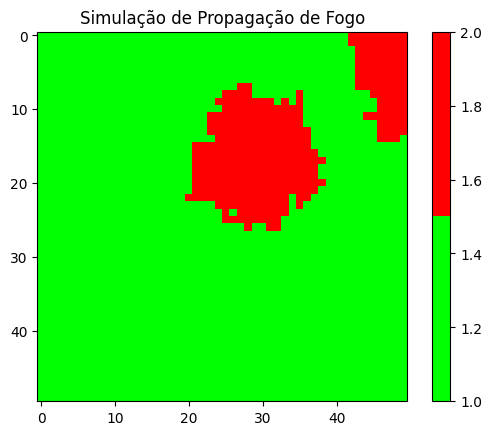

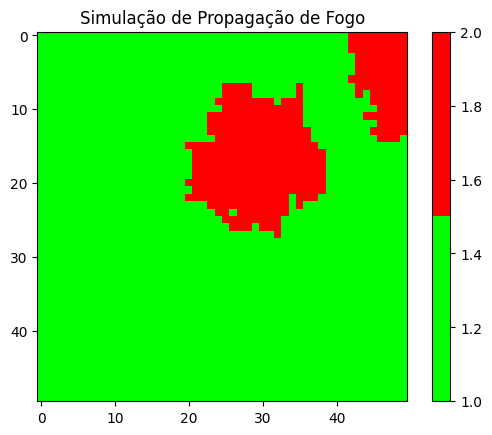

In [ ]:
def principal():
    grade = inicializar_grade(linhas, colunas, prob_inicial_fogo)
    visualizar_grade(grade)

    num_passos = 30
    for passo in range(num_passos):
        grade = atualizar_grade(grade, prob_propagacao_fogo)
        visualizar_grade(grade)

if __name__ == "__main__":
    principal()

# MODELO CLASSIFICAÇÃO DE VEGETAÇÃO  - PROTÓTIPO

In [ ]:
import numpy as np
from skimage import io, color
from skimage.transform import resize
from skimage.util import random_noise
import os
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
def generate_image(dry: bool, size: int = 256) -> np.ndarray:
    base_color = [0.4, 0.5, 0.1] if dry else [0.1, 0.4, 0.1]
    image = np.ones((size, size, 3)) * base_color
    image = random_noise(image, mode='gaussian', var=0.01)
    image = color.rgb2hsv(image)
    image[..., 1] *= np.random.uniform(0.5, 1.5)
    image[..., 2] *= np.random.uniform(0.7, 1.3)
    image = color.hsv2rgb(image)
    image = np.clip(image, 0, 1)
    return image


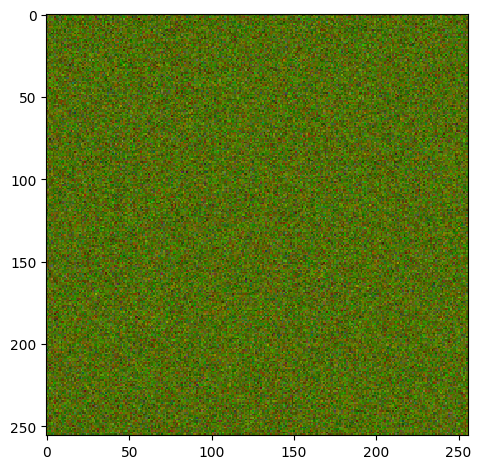

In [ ]:
dry_image = generate_image(dry=True)
io.imshow(dry_image)
io.show()


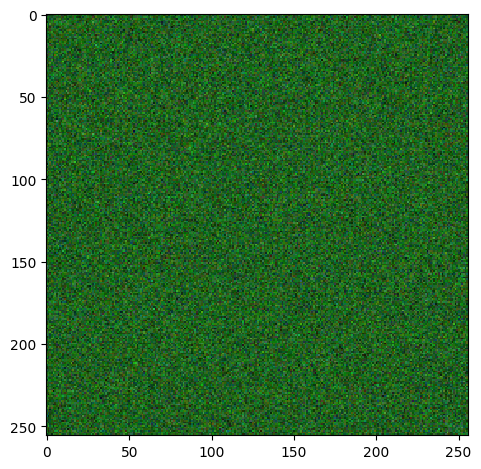

In [ ]:
non_dry_image = generate_image(dry=False)
io.imshow(non_dry_image)
io.show()

In [ ]:
os.makedirs('dataset/train/dry', exist_ok=True)
os.makedirs('dataset/train/non_dry', exist_ok=True)
os.makedirs('dataset/validation/dry', exist_ok=True)
os.makedirs('dataset/validation/non_dry', exist_ok=True)

In [ ]:
for i in range(1000):
    image = generate_image(dry=True)
    image_uint8 = img_as_ubyte(image)
    io.imsave(f'dataset/train/dry/image_{i:04d}.png', image_uint8)

for i in range(1000):
    image = generate_image(dry=False)
    image_uint8 = img_as_ubyte(image)
    io.imsave(f'dataset/train/non_dry/image_{i:04d}.png', image_uint8)

for i in range(500):
    image = generate_image(dry=True)
    image_uint8 = img_as_ubyte(image)
    io.imsave(f'dataset/validation/dry/image_{i + 1000:04d}.png', image_uint8)

for i in range(500):
    image = generate_image(dry=False)
    image_uint8 = img_as_ubyte(image)
    io.imsave(f'dataset/validation/non_dry/image_{i + 1500:04d}.png', image_uint8)

Modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
input_shape = (256, 256, 3)
num_classes = 2
batch_size = 32
num_epochs = 2
learning_rate = 0.01

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [ ]:
metrics = [tf.keras.metrics.BinaryAccuracy()]


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
val_generator = train_datagen.flow_from_directory(
    'dataset/validation',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [ ]:
history = model.fit(train_generator,
                    epochs=num_epochs,
                    validation_data=val_generator,
                    verbose = 1)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 239s 5s/step - loss: 3.2783 - binary_accuracy: 0.8925 - val_loss: 8.6738e-07 - val_binary_accuracy: 1.0000
Epoch 2/2
50/50 [==============================] - 244s 5s/step - loss: 2.0314e-08 - binary_accuracy: 1.0000 - val_loss: 1.1254e-07 - val_binary_accuracy: 1.0000


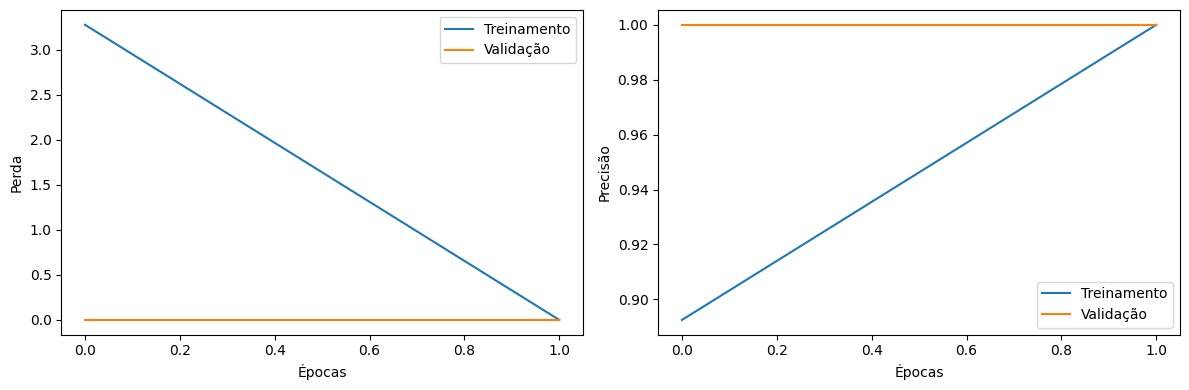

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Treinamento')
plt.plot(history.history['val_binary_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

image_path = '/content/cozinha-verde.jpg'
img = Image.open(image_path)
img = img.resize((256, 256))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 397ms/step
[[1.4168394e-19 1.0000000e+00]]


In [ ]:
if predictions[0][0] > 0.5:
    result = "Vegetação Seca"
else:
    result = "Vegetação Não Seca"

print("Resultado da previsão:", result)

Resultado da previsão: Vegetação Não Seca


# INTEGRAÇÃO COM DRONE

In [ ]:
import cv2
import numpy as np
import torch
from djitellopy import tello
from models.common import DetectMultiBackend
from utils.general import non_max_suppression
from utils.torch_utils import select_device
from pathlib import Path
import time

# Definindo o tamanho da largura (w) e altura (h) da imagem
w, h = 360, 240

# Definindo o intervalo de áreas para detecção do fogo
fbRange = [12000, 40000]

# Carregando o modelo
weights = '/Volumes/SSD Victor/TUDO/yolov5-fire-detection-main/models/best.pt'
device = select_device('')
model = DetectMultiBackend(weights, device=device)
model.eval()


# Função para detectar o fogo na imagem
def detect_fire(frame, model, device):
    imgsz = (640, 640)
    conf_thres = 0.1
    img = cv2.resize(frame, imgsz)
    img = img[..., ::-1]
    img = img.copy()
    img = np.transpose(img, (2, 0, 1))
    img = np.expand_dims(img, axis=0)
    img = torch.from_numpy(img).float().div(255.0).to(device)
    pred = model(img)[0]
    pred = non_max_suppression(pred, conf_thres)
    for det in pred:
        if len(det):
            box = tuple(map(int, det[0][:4].tolist()))
            area = (box[2] - box[0]) * (box[3] - box[1])
            return box, area
    return None, 0


# Função para ajustar a orientação do drone com base na posição do fogo
def turn_drone(x, section_width):
    yaw = 0
    if x < section_width:
        print("Virando no sentido anti-horário")
        yaw = -30
    elif x > 3 * section_width:
        print("Virando no sentido horário")
        yaw = 30
    elif section_width <= x <= 3 * section_width:  # Se o fogo estiver no centro
        print("Fogo está no centro, permanecendo no lugar")
        yaw = 0
    return yaw


# Função para rastrear o fogo
def track_fire(info, w):
    area = info[1]
    x, _ = info[0]
    section_width = w // 4

    # Movimento para frente e para trás
    fb = 0
    if area > fbRange[0] and area < fbRange[1]:
        fb = 0
    elif area > fbRange[1]:
        fb = -30
    elif area < fbRange[0] and area != 0:
        fb = 30
    print("Frente/Trás:", fb)

    # Virando com base na posição
    yaw = turn_drone(x, section_width)
    me.send_rc_control(0, fb, 0, yaw)


# Inicializando o drone e realizando a decolagem
me = tello.Tello()
me.connect()
print(me.get_battery())
me.streamon()
me.takeoff()

# Alterando a altura inicial
me.send_rc_control(0, 0, 24, 0)
time.sleep(2.4)

# Loop principal para detecção e rastreamento contínuos
while True:
    img_bgr = me.get_frame_read().frame
    img_bgr_resized = cv2.resize(img_bgr, (w, h))
    img_rgb = cv2.cvtColor(img_bgr_resized, cv2.COLOR_BGR2RGB)
    fire_box, area = detect_fire(img_rgb, model, device)
    if fire_box is not None:
        scale_x = w / 640
        scale_y = h / 640
        x, y, x2, y2 = map(lambda v, s: int(v * s), fire_box,
                           (scale_x, scale_y, scale_x, scale_y))  # Aplicando escalas separadas
        cv2.rectangle(img_bgr_resized, (x, y), (x2, y2), (0, 255, 0), 2)
        cx, cy = (x + (x2 - x) // 2, y + (y2 - y) // 2)
        track_fire([[cx, cy], area], w)
        print("Centro:", (cx, cy), "Área:", area)
    cv2.imshow("Imagem", img_bgr_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        me.land()
        break
